# Project 8: Machine Learning for Predictive Analytics

##### By Vishal Parekh

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv(r"E:\Downloads\Telecom Data.csv")

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better
#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 58)

In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
cust_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [6]:
len(cust_df)

51047

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [7]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df[cust_df['MonthlyRevenue'] == 0]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No


In [8]:
df = cust_df
df.dropna(subset=["MonthlyRevenue"], inplace = True)
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


In [9]:
print(cust_df['MonthlyRevenue'].isnull().sum())

0


### Q1.2 How many columns has missing values percentage > 5%

In [10]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}) 
missing_value_df

,column_name,percent_missing
CustomerID,CustomerID,0.000000
Churn,Churn,0.000000
MonthlyRevenue,MonthlyRevenue,0.000000
MonthlyMinutes,MonthlyMinutes,0.000000
TotalRecurringCharge,TotalRecurringCharge,0.000000
DirectorAssistedCalls,DirectorAssistedCalls,0.000000
OverageMinutes,OverageMinutes,0.000000
RoamingCalls,RoamingCalls,0.000000
PercChangeMinutes,PercChangeMinutes,0.414612
PercChangeRevenues,PercChangeRevenues,0.414612


<mark>__Result:__
    
From the above result we can see that, no columns in the dataframe has a missing percentage of data greater than 5%, it's less than 2%.
    
    Some of the strategy used for imputations are

     a. Delete Rows with Missing Values, but it looses a lot of data, not 
        suitable for columns having more missing percentage 
     b. Impute missing values with Mean/Median, 
        But works only with numerical continuous variables.
        Can cause data leakage
     c. Using Algorithms that support missing values like KNN or Naive Bayes.
     d. Prediction of missing values using Regression or Classification. 




### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

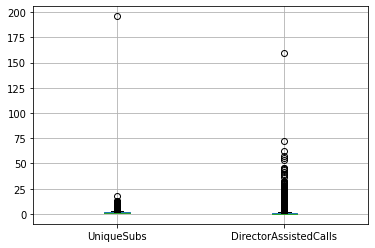

In [11]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [12]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
qValue = [i / 100 for i in range(95,101,1)]
cust_df[cols].quantile(qValue)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,196.0,159.39


In [13]:
df[df.UniqueSubs >= 196]
df[df.DirectorAssistedCalls>= 159.39]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
23267,3183090,Yes,67.74,0.0,85.0,0.0,0.0,0.0,0.0,0.5,...,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
5970,3046638,No,521.61,7359.0,210.0,159.39,1040.0,1.9,-1070.0,-154.8,...,0,6,No,0,60,No,5-Low,Other,Other,No


In [14]:
df = df.drop(23267)

In [15]:
df = df.drop(5970)

## Q2. Perform exploratory analysis to analyze customer churn

<AxesSubplot:>

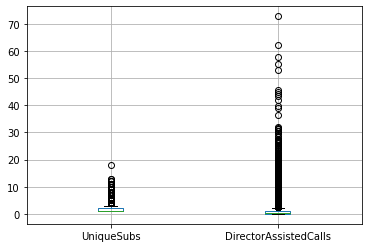

In [16]:
cols=["UniqueSubs","DirectorAssistedCalls"]
df.boxplot(column=cols)

In [17]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

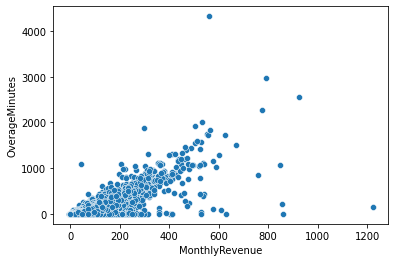

In [18]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

In [19]:
column_1 = df["MonthlyRevenue"]
column_2 = df["OverageMinutes"]
correlation = column_1.corr(column_2)
print(correlation)

0.7873878505652224


<mark>__Result:__
    

From the above graph we can find that, the attributes MonthlyRevenue and Overage Minutes have a strong positive correlation which is 0.787 and it tends to +1.
    
Thus, both the variables move in the same direction.

Thus, if the customer works an extra time other than the pre paid allocation, his/her monthly revenue increases and vice versa.

Hence they are strongly correlated.


### Q2.2 Does high number of active subscribers lead to low monthly revenue?

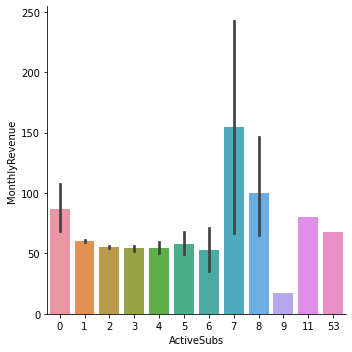

In [20]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x='ActiveSubs',y ='MonthlyRevenue',data=cust_df, kind='bar') 

<mark>__Result:__
    

From the above plot we can see that, high active number of subscribers does not have the lowest Monthly Revenue but also not the greatest Monthly revenue.
    

High number of active subs also have the monthly revenue between 50-100 USD


### Q2.3 Does credit rating have an impact in churn rate?

In [21]:
print(df['CreditRating'].value_counts())

2-High       18992
1-Highest     8462
3-Good        8391
5-Low         6457
4-Medium      5342
7-Lowest      2101
6-VeryLow     1144
Name: CreditRating, dtype: int64


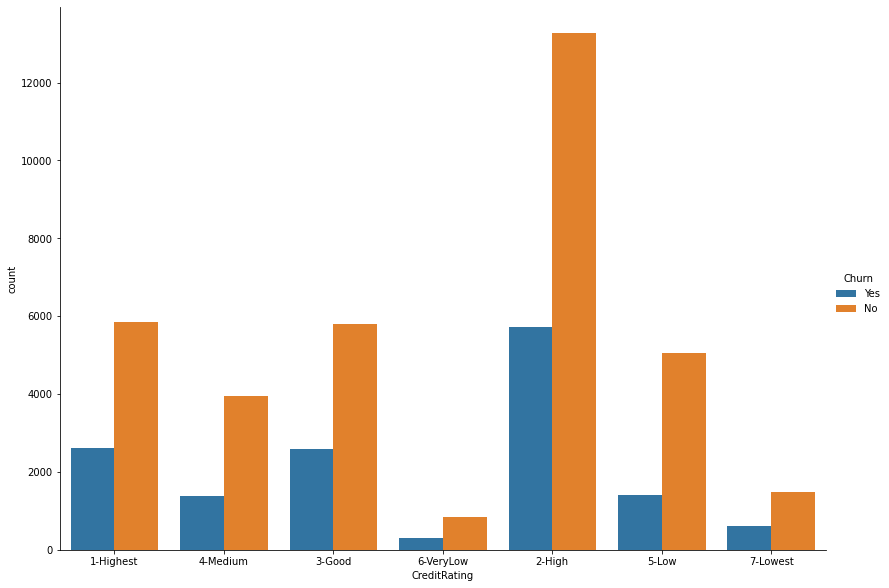

In [22]:
sns.catplot(x = 'CreditRating', kind = 'count', hue = "Churn", data = cust_df, height=8.27, aspect=11.7/8.27)

<mark>__Result:__
    

    People having high credit rating has the highest churn rate.
    People having the lowest credit rating has the lowest churn rate.
    People having high credit rating has a higher chances not to churn.
    People having the lowest credit rating is least likely to churn.


### Placeholder for additional exploratory analysis

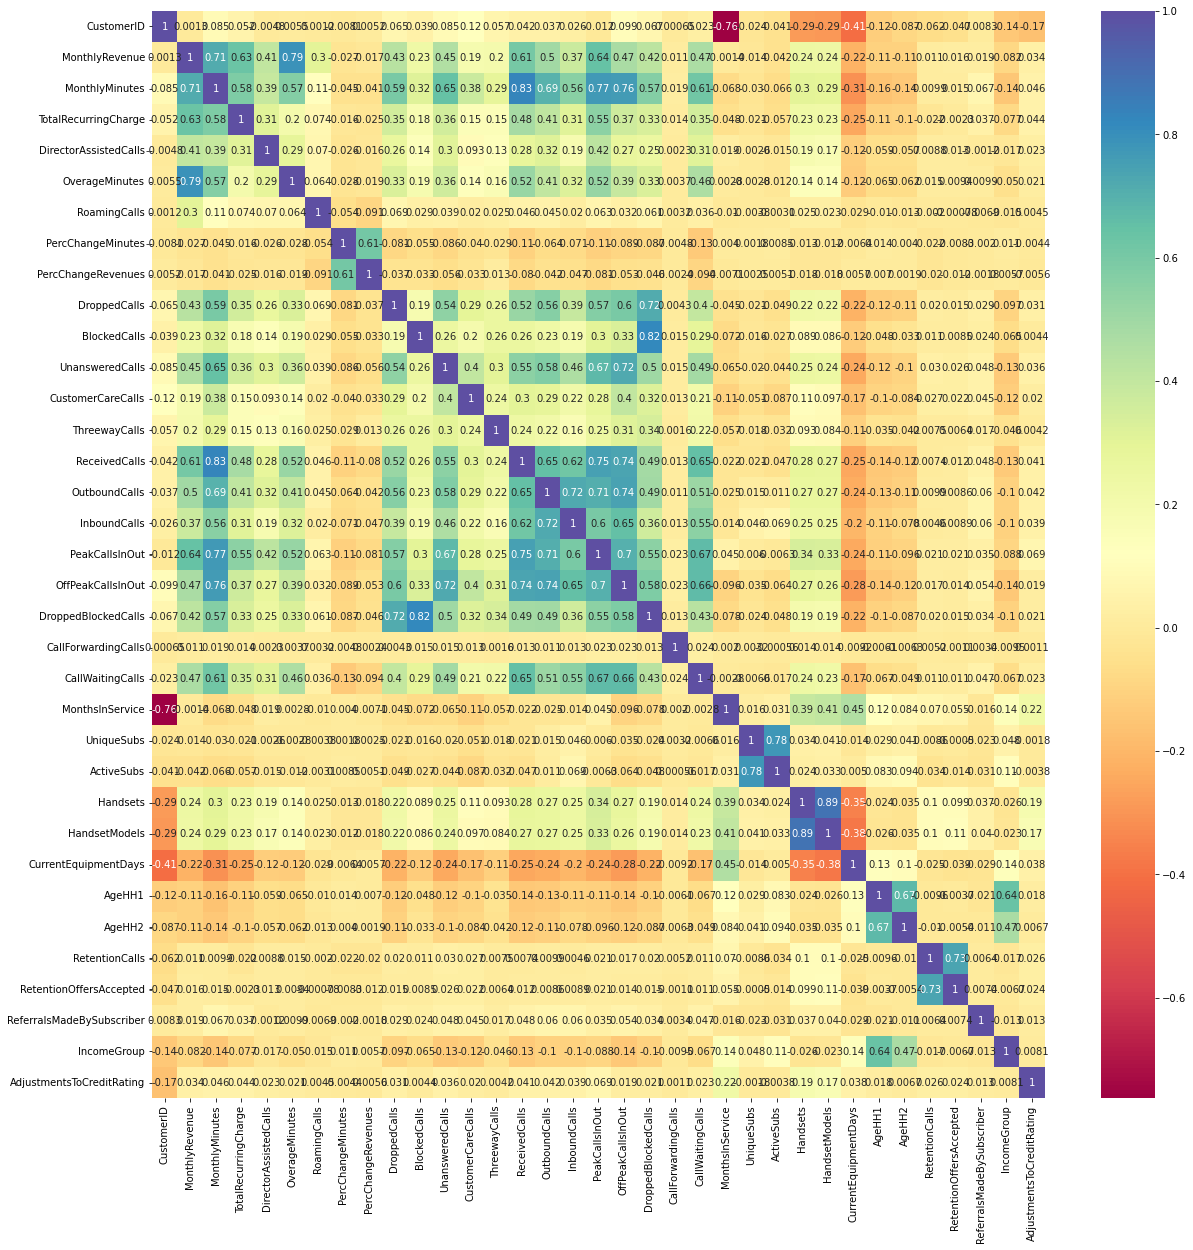

In [23]:
#type your code here for any additional exploratory analysis (if any)
# calculating correlation among numeric variable
corr_matrix = cust_df.corr()

# plot correlation matrix
plt.figure(figsize = (20,20))

sns.heatmap(corr_matrix, cmap = 'Spectral', annot=True);


<AxesSubplot:xlabel='Churn', ylabel='count'>

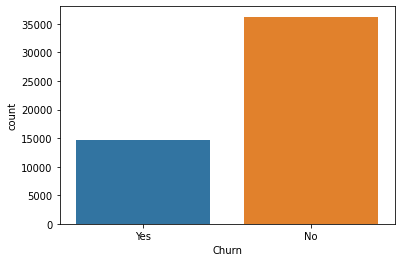

In [24]:
#a count check for the categorical variable
sns.countplot(x="Churn",data=cust_df)
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

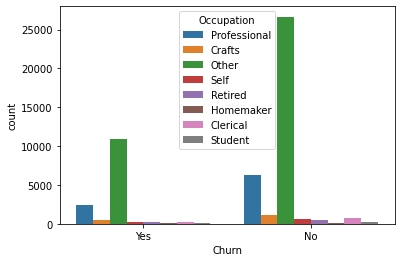

In [25]:
sns.countplot(x="Churn",hue="Occupation",data=cust_df)

## Q3. Create additional features to help predict churn

In [26]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge'] = cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_avg_minutes'] = cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [27]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_avg_minutes
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.000000
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,Unknown,No,3-Good,Other,Other,Yes,1.0,0.532581,0.682540
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,...,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown,1.0,1.000000,0.000000
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,Unknown,No,1-Highest,Other,Professional,Unknown,1.0,0.972357,0.005525
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,30,No,5-Low,Other,Professional,Yes,1.0,0.255341,0.651042


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [28]:
# List of variables to map

varlist =  ['Churn']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
cust_df[varlist] = cust_df[varlist].apply(binary_map)

In [29]:
cust_df.Churn

0        1
1        1
2        0
3        0
4        1
        ..
51037    0
51039    0
51040    0
51041    1
51043    0
Name: Churn, Length: 50891, dtype: int64

In [30]:
cust_df.isnull().sum()

CustomerID                 0
Churn                      0
MonthlyRevenue             0
MonthlyMinutes             0
TotalRecurringCharge       0
                        ... 
Occupation                 0
MaritalStatus              0
perc_active_subs           0
perc_recurrent_charge      5
perc_avg_minutes         723
Length: 61, dtype: int64

In [31]:
cust_df = cust_df.dropna()

In [32]:
cust_df.isnull().sum()

CustomerID               0
Churn                    0
MonthlyRevenue           0
MonthlyMinutes           0
TotalRecurringCharge     0
                        ..
Occupation               0
MaritalStatus            0
perc_active_subs         0
perc_recurrent_charge    0
perc_avg_minutes         0
Length: 61, dtype: int64

In [33]:
#replacing infinite values if any
cust_df.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)

In [34]:
count_class_0, count_class_1 = cust_df.Churn.value_counts()
df_class_0 = cust_df[cust_df['Churn']==0]
df_class_1 = cust_df[cust_df['Churn']==1]

In [35]:
df_class_0.shape

(35237, 61)

In [36]:
df_class_1.shape

(13842, 61)

In [37]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    35237
1    35237
Name: Churn, dtype: int64


In [38]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
X = df_test_over.drop(columns=['Churn'])
#Create dummy variables for all categorical variables
X = pd.get_dummies(X)

# Y = Dependent variable (churn flag)
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [39]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)


LogisticRegression()

In [41]:
#-------------------------------- Model testing ---------------------------------#
log_reg.score(X_test, y_test)
#type your code here to predict for X_test data set using the fitted model
y_pred = log_reg.predict(X_test)
a= '\033[1m'
b= '\033[0m'
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
print(a+ 'Classification report of Model :\n' +b, classification_report(y_pred, y_test))
print(a+ 'Confusion matrix of Model :\n' +b, confusion_matrix(y_pred, y_test))


0.5459017168802913

Classification report of Model :
               precision    recall  f1-score   support

           0       0.49      0.54      0.52      9415
           1       0.60      0.55      0.57     11728

    accuracy                           0.55     21143
   macro avg       0.55      0.55      0.54     21143
weighted avg       0.55      0.55      0.55     21143

Confusion matrix of Model :
 [[5125 4290]
 [5311 6417]]


In [42]:
# converting to dataframe
X_train_rfe = pd.DataFrame(X_train, columns=X.columns)
X_test_rfe = pd.DataFrame(X_test, columns=X.columns)

In [46]:
#Precision, Recall, Accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("F1 Score: %.3f" % f1_score(y_test, y_pred))

Precision: 0.547
Recall: 0.599
Accuracy: 0.546
F1 Score: 0.572


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [47]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, random_state=42, max_leaf_nodes=50)



In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [49]:
y_pred_rf=rfc.predict(X_test)

In [51]:
print(a+'Model score before RFE:' +b, rfc.score(X_test,y_test))

Model score before RFE: 0.6087121032965993


In [52]:
print(a+ 'Classification report before RFE :\n\n' +b, classification_report(y_test,y_pred_rf))

Classification report before RFE :

               precision    recall  f1-score   support

           0       0.60      0.61      0.60     10436
           1       0.61      0.61      0.61     10707

    accuracy                           0.61     21143
   macro avg       0.61      0.61      0.61     21143
weighted avg       0.61      0.61      0.61     21143



In [53]:
print(a+ 'Confusion matrix before RFE :\n\n' +b, confusion_matrix(y_pred, y_test))

Confusion matrix before RFE :

 [[5125 4290]
 [5311 6417]]


In [54]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Estimate the model performance using K fold cross validation

In [55]:
from sklearn.model_selection import cross_val_score
from numpy import mean

In [58]:
scores = cross_val_score(rfc,X,y,scoring='accuracy',cv=20,n_jobs=-1)
print('Accuracy: %.3f' % mean(scores))

Accuracy: 0.528


In [59]:
print("Precision: %.3f" % precision_score(y_test, y_pred_rf))
print("Recall: %.3f" % recall_score(y_test, y_pred_rf))
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred_rf))
print("F1 Score: %.3f" % f1_score(y_test, y_pred_rf))

Precision: 0.614
Recall: 0.612
Accuracy: 0.609
F1 Score: 0.613


<mark>__Result:__
    
Random Forest has better accuracy in terms of precision.

### Q4.3 Identify most important features impacting churn

CustomerID               0.071935
MonthlyRevenue           0.012306
MonthlyMinutes           0.028960
TotalRecurringCharge     0.024718
DirectorAssistedCalls    0.005125
                           ...   
Occupation_Self          0.000784
Occupation_Student       0.000000
MaritalStatus_No         0.001840
MaritalStatus_Unknown    0.002126
MaritalStatus_Yes        0.001244
Length: 851, dtype: float64

<AxesSubplot:>

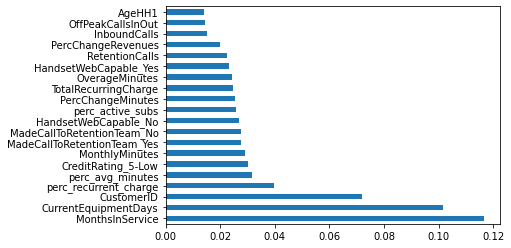

In [65]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')